In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Deep Learning\AirPassengers.csv")

In [7]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df.columns=['Date', 'Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Visualizing the time series

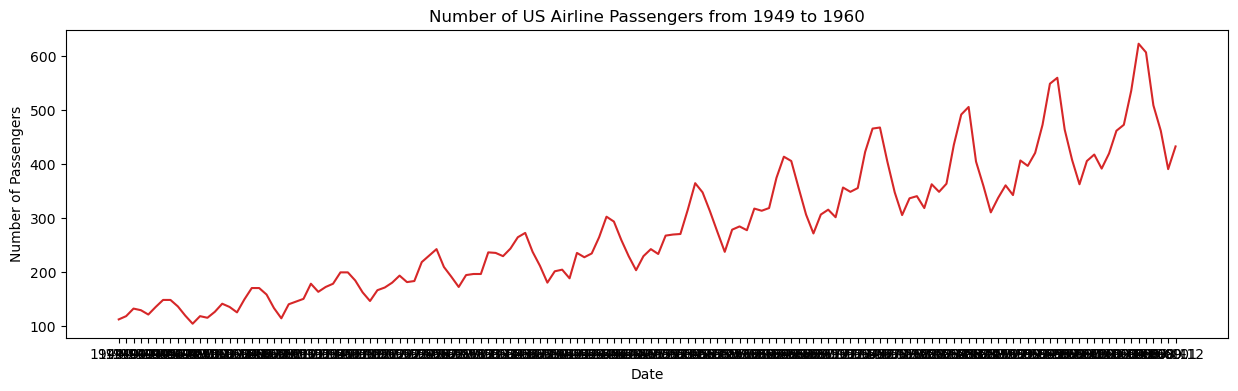

In [24]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline Passengers from 1949 to 1960')

Since all the values are positive we can show this on both sides of the Y axis to emphasize the growth

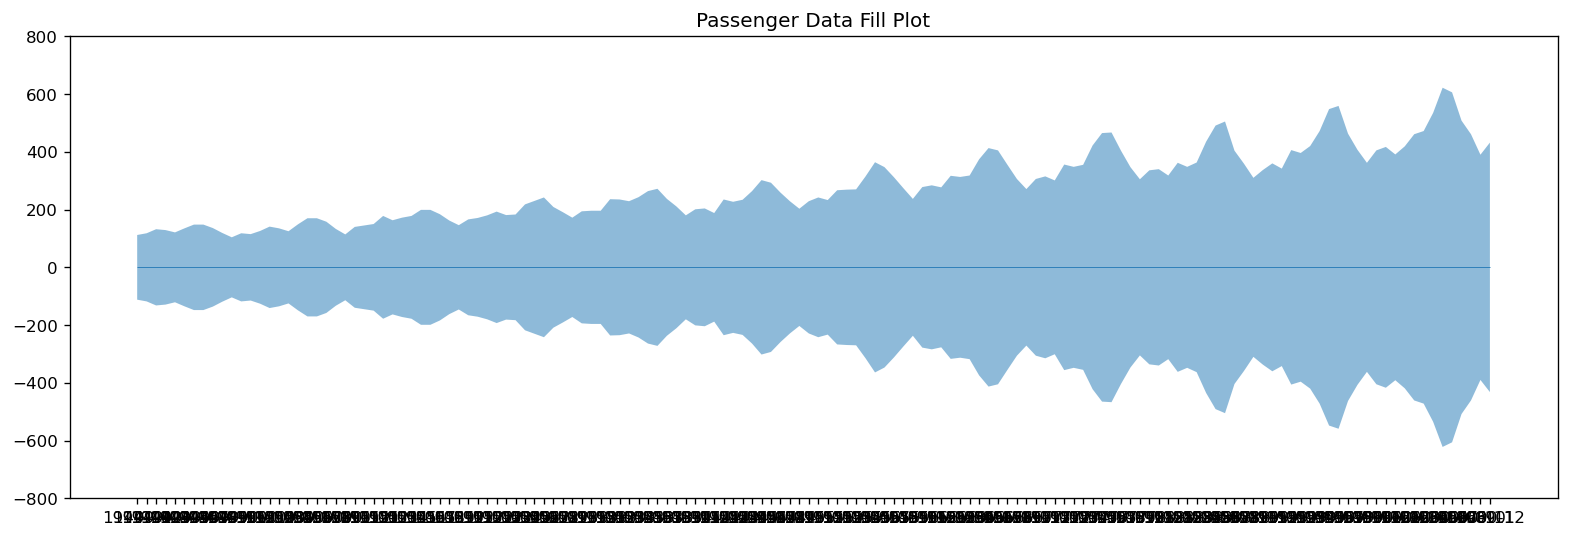

In [31]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
ax.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2)
ax.set_ylim(-800, 800)
plt.title("Passenger Data Fill Plot")
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()
plt.show()


it can be seen that a monthly time series and follows a certain repetitive pattern every year so we can plot each year as a seperate line in the same plot. This let us compare the year wise patterns side by side

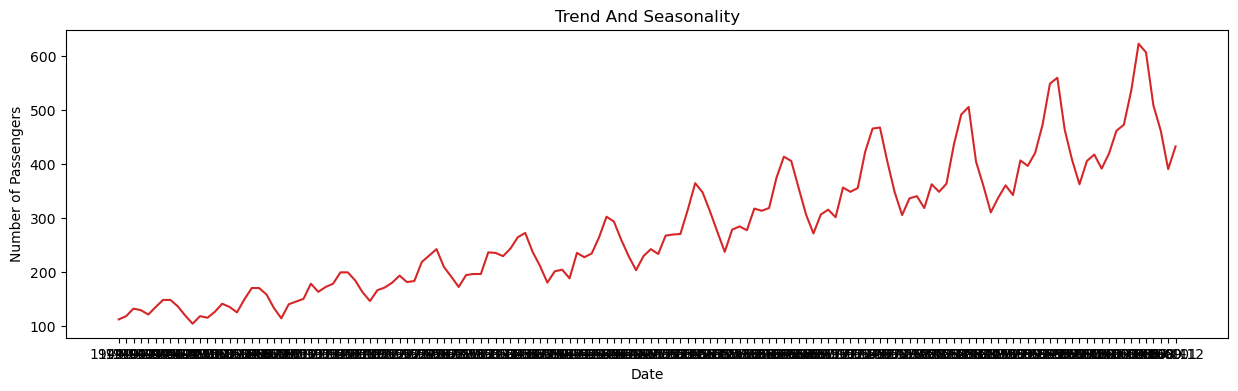

In [34]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend And Seasonality')

Cyclic behaviour

Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

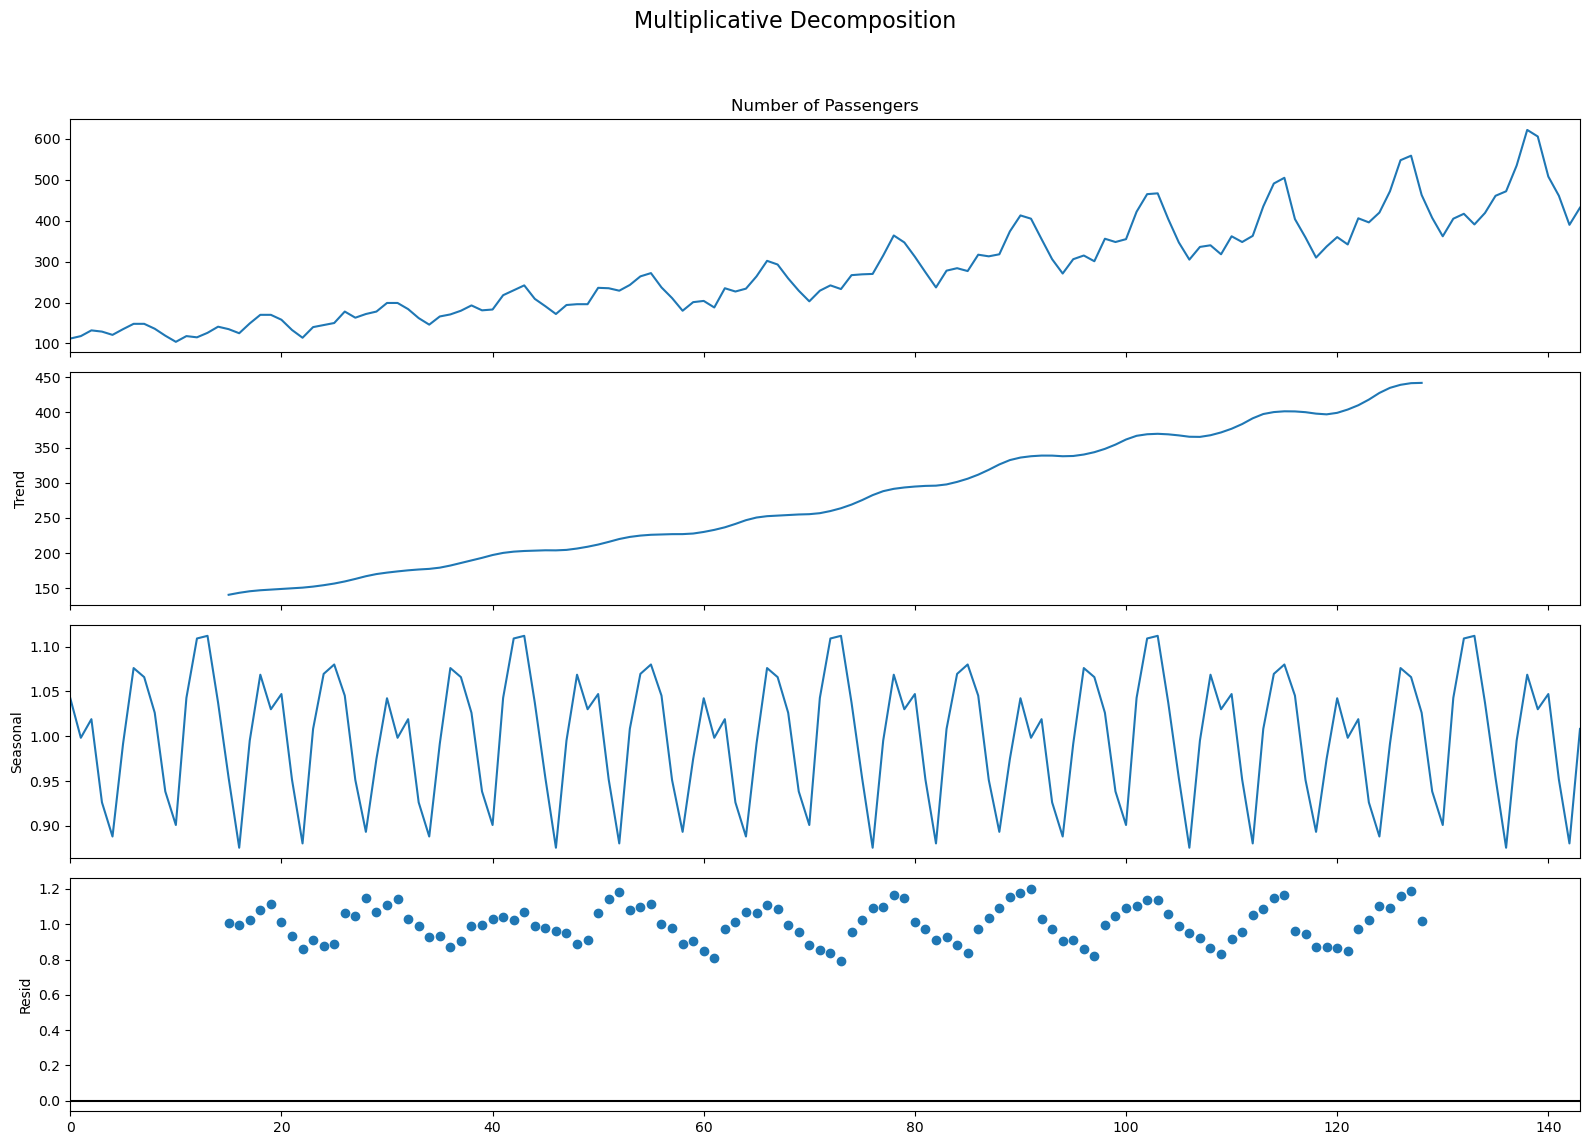

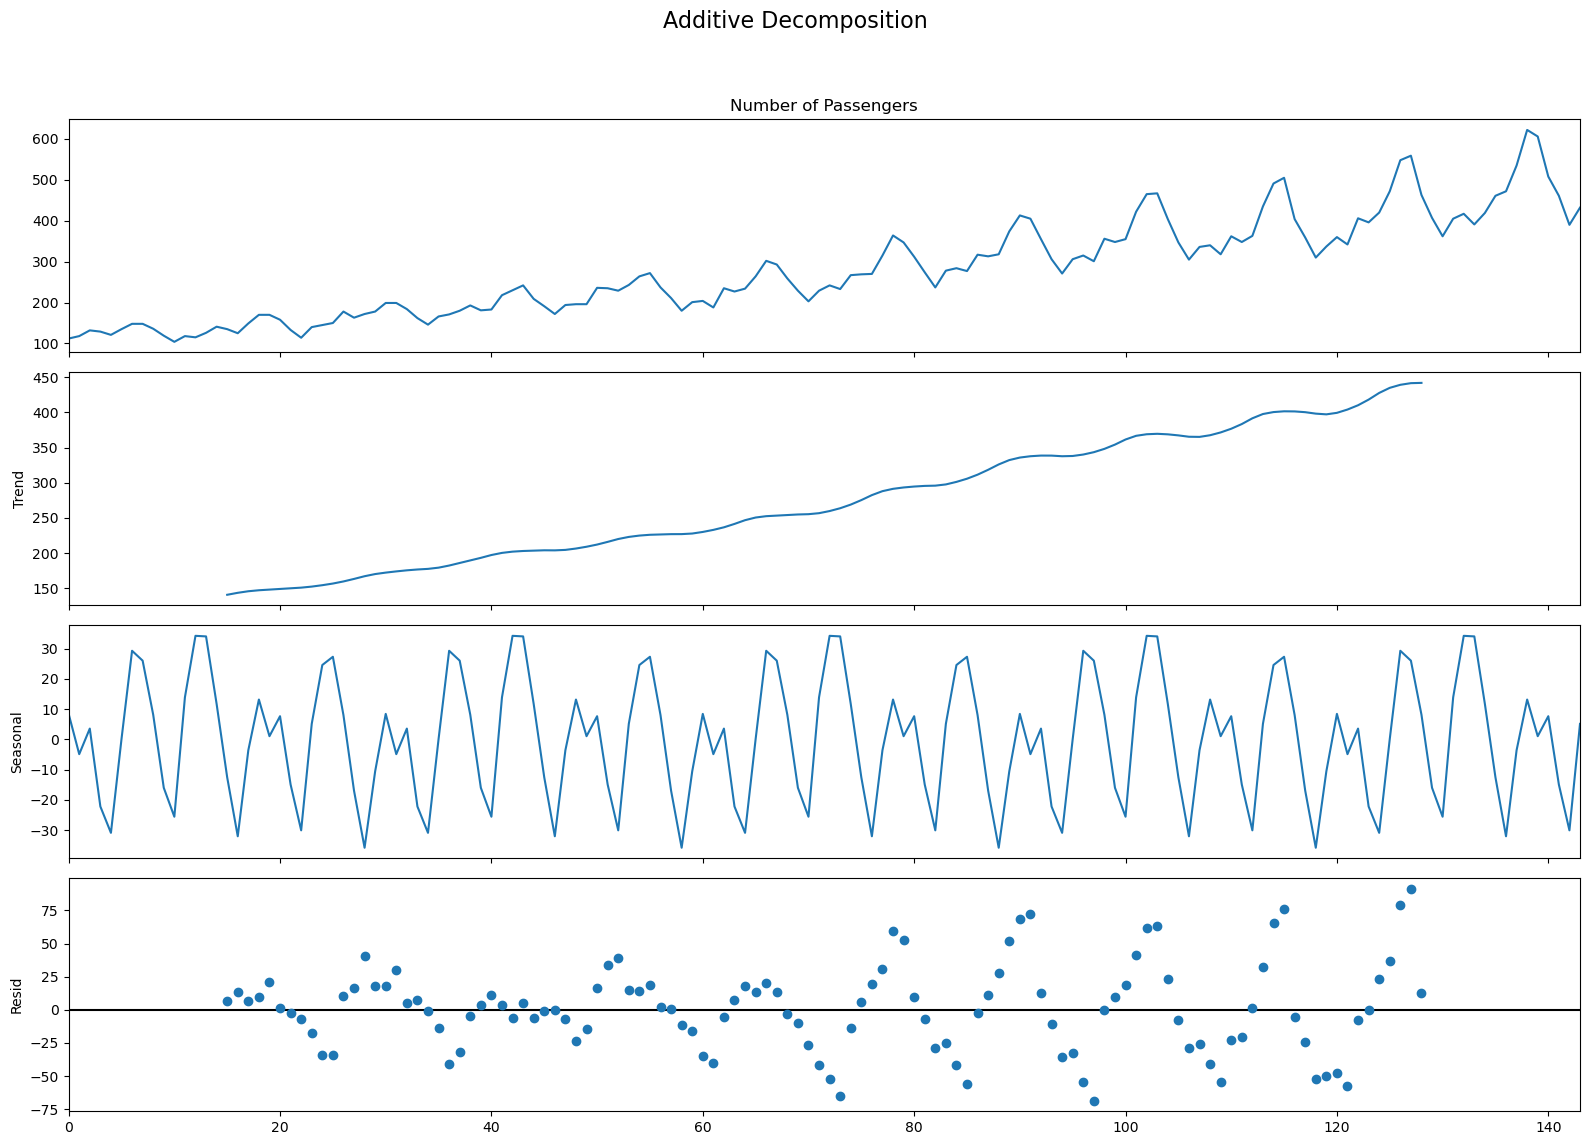

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series

9. Stationary and Non-Stationary Time Series

12. Difference between white noise and a stationary series ¶
Table of Contents

Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

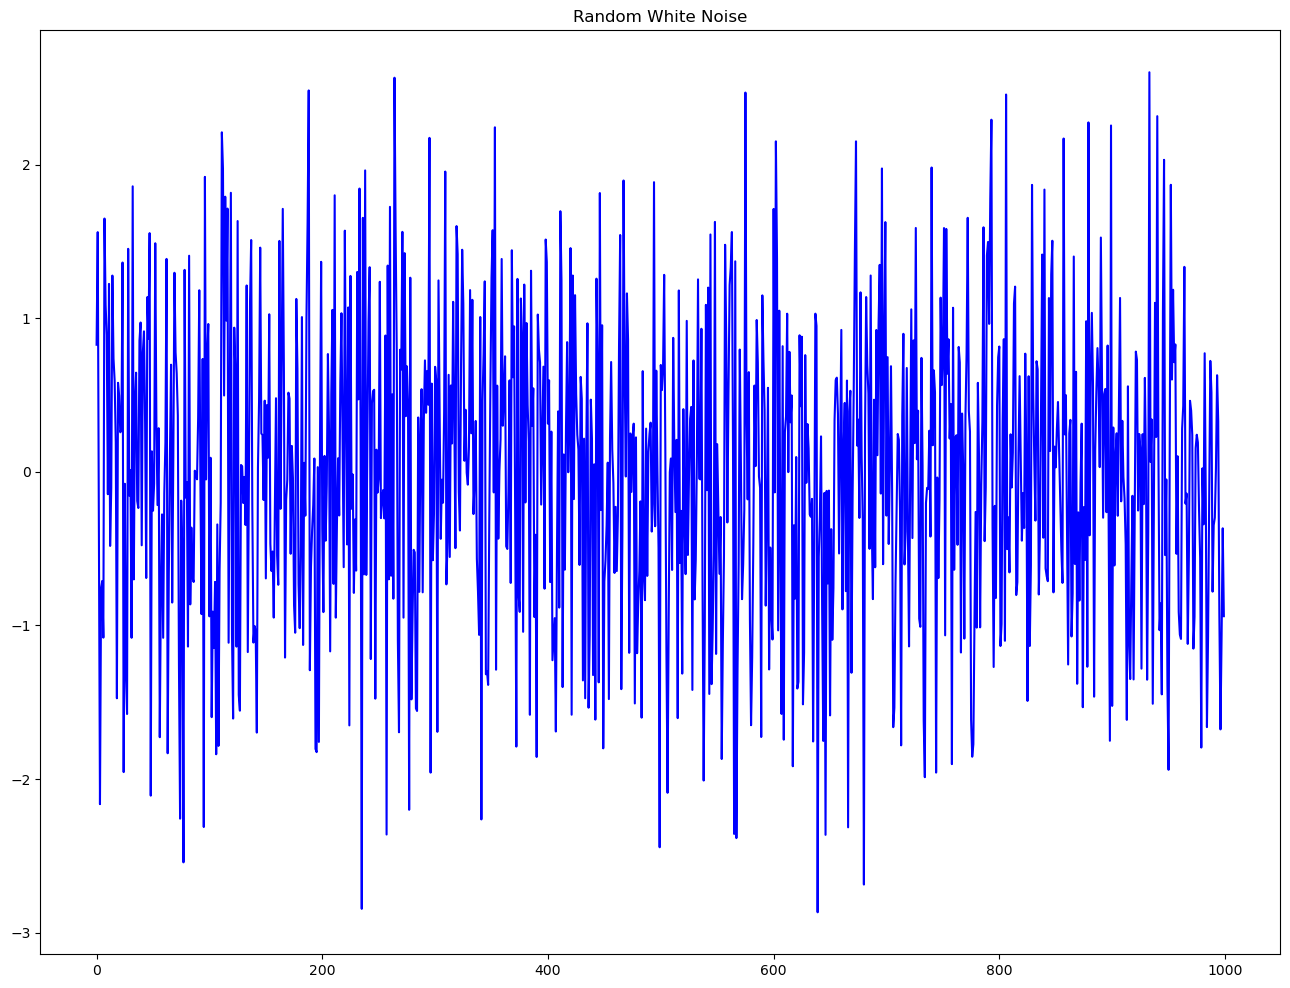

In [56]:
rand_numbers = np.random.randn(1000)  # Generate 1000 random numbers from normal distribution
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')  # Plot it
plt.show()

13. Detrend a Time Series 


Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the lead=st squares from it')

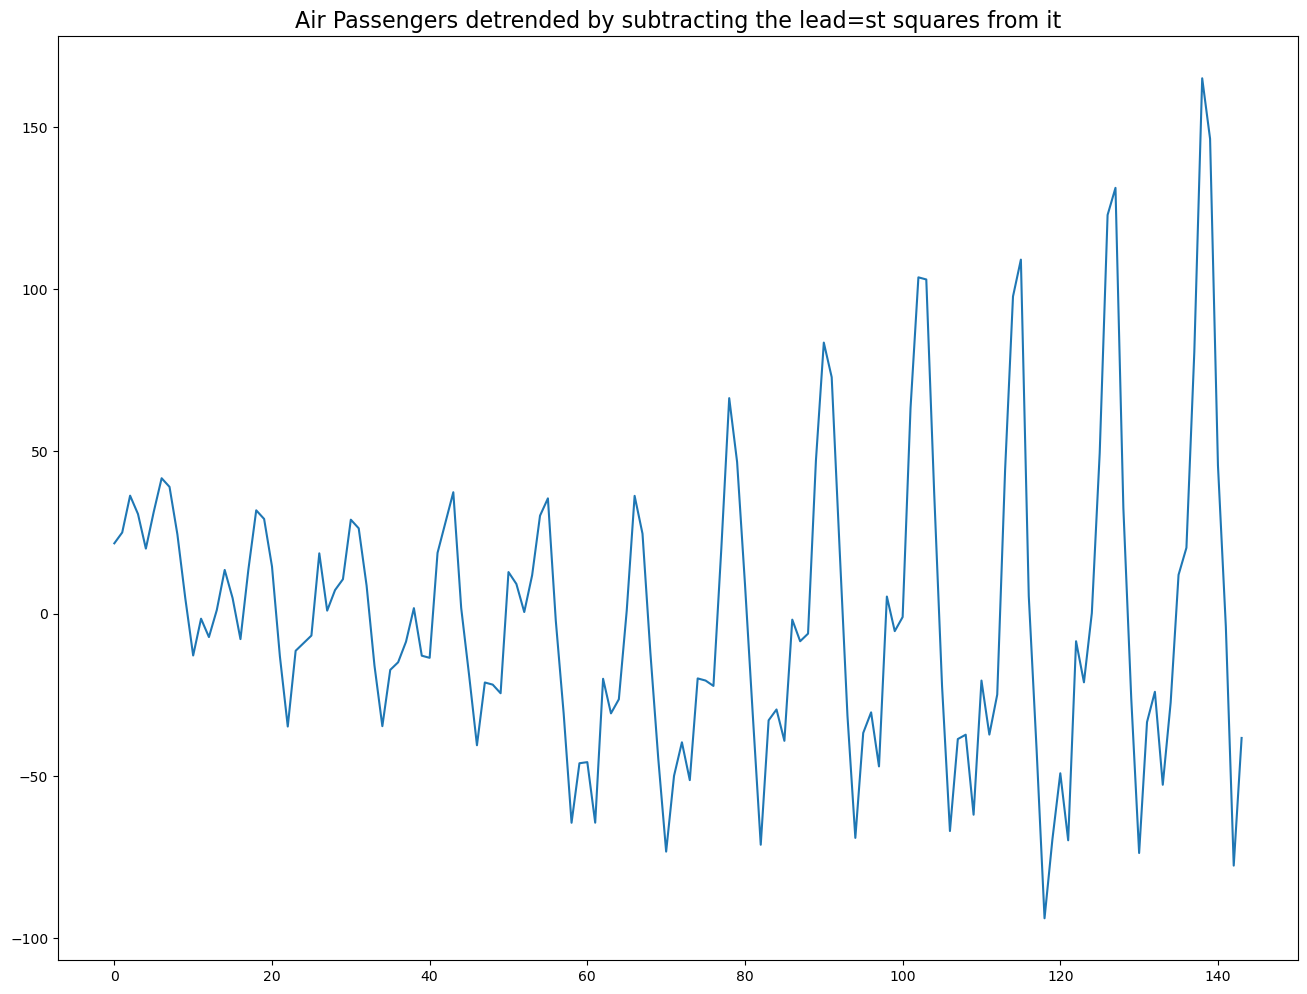

In [60]:
## Using Scipy: Subtract the line of best fit
from scipy import signal
detrended=signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title("Air Passengers detrended by subtracting the lead=st squares from it", fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

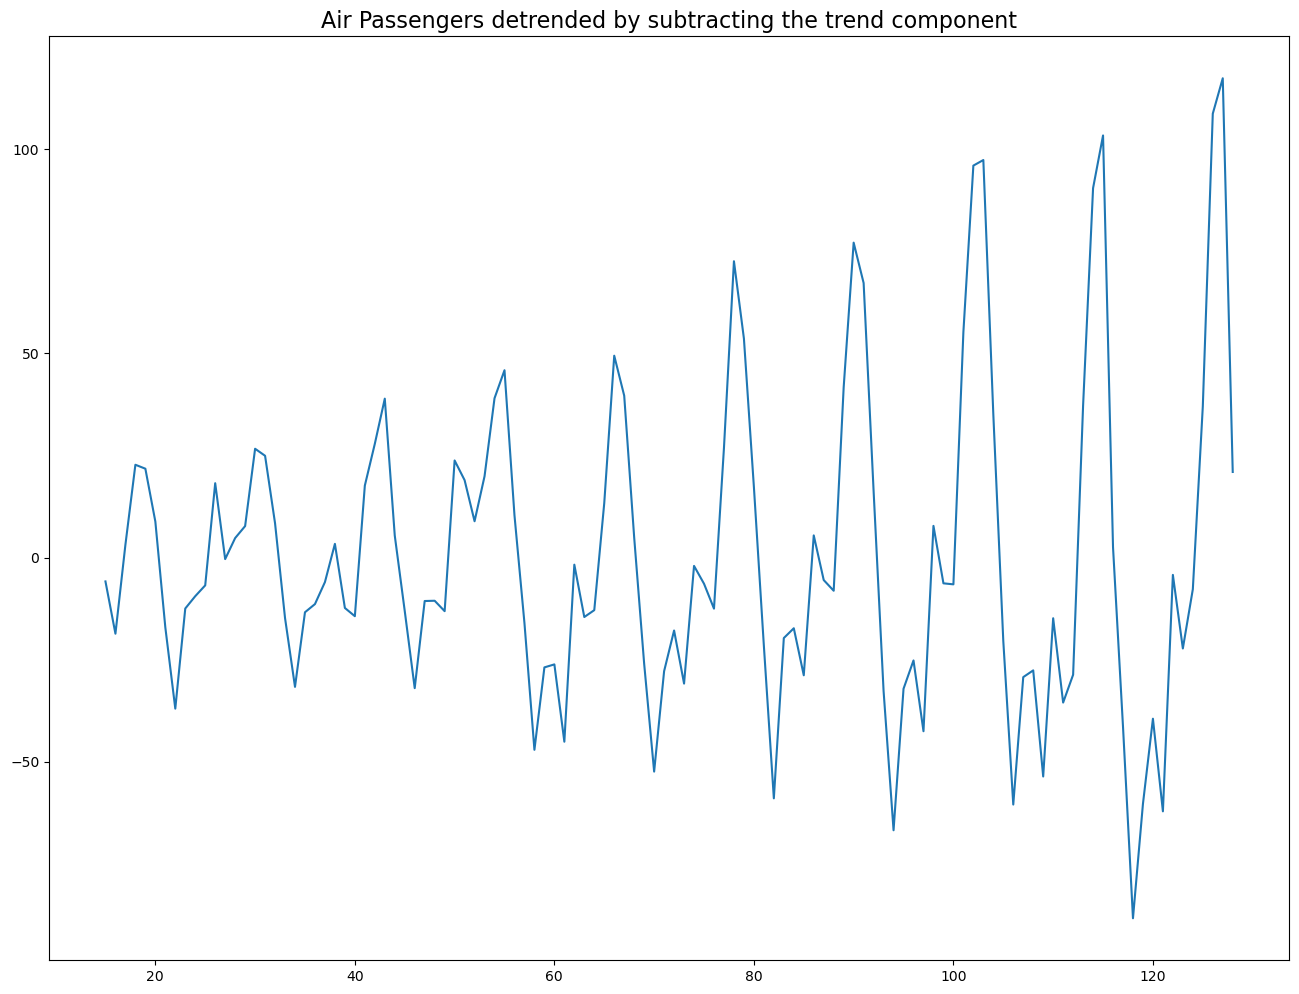

In [63]:
### Using the statsmodels: Subtracting the trend component

from statsmodels.tsa.seasonal import seasonal_decompose
result_mul=seasonal_decompose(df['Number of Passengers'], model='Multiplicative', period=30)
detrended=df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title("Air Passengers detrended by subtracting the trend component", fontsize=16)

📊 What is Deseasonalization?

Deseasonalizing a time series means removing the seasonal component from the data — the repeating patterns that occur at regular intervals (like daily, monthly, quarterly, yearly).

[]

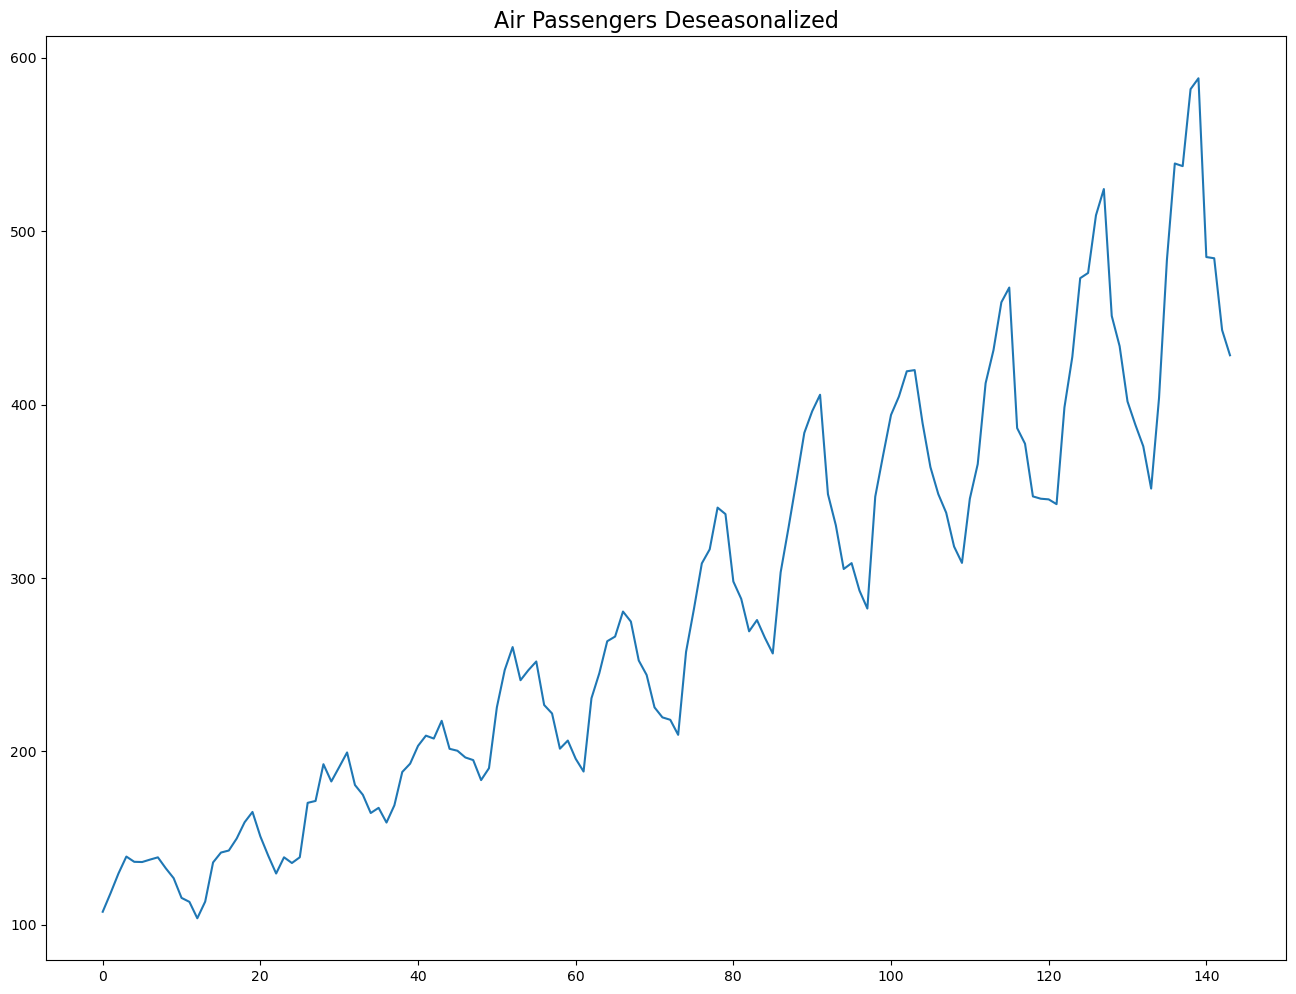

In [71]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

15. How to test for seasonality of a time series? ¶


The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

Hour of day

Day of month

Weekly

Monthly

Yearly


However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

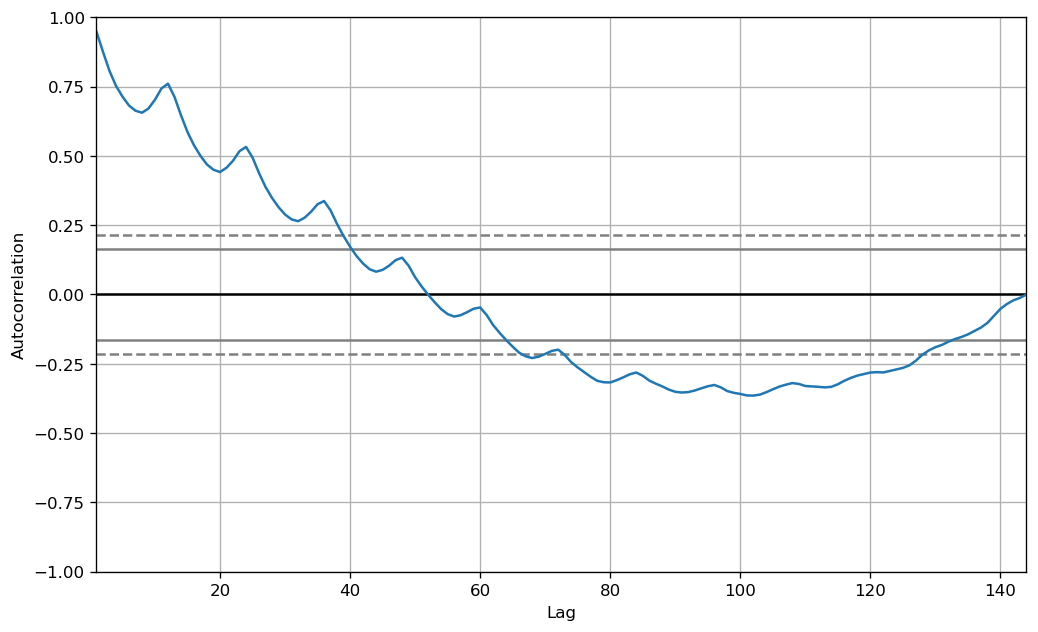

In [78]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())